### Se importan las librerias a utilizar

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import warnings
import sys
import os
warnings.filterwarnings('ignore')
from IPython.display import HTML
import statsmodels.formula.api as sm
from sklearn.tree import export_text
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import statsmodels.formula.api as sfm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
#!pip install -U imbalanced-learn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from pylab import rcParams
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier
from collections import Counter

### Utilizando la libreria pandas, logramos leer el archivo csv

In [ ]:
df = pd.read_csv("weatherAUS.csv", sep=',', encoding='latin-1')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


### Filtramos el dataset para mostrar solo las 3 ciudades escogidas, en este caso son "Portland", "Adelaide" y "Melbourne".

In [ ]:
df1= df[(df['Location'] =='Portland')|(df['Location'] == 'Adelaide')|(df['Location'] == 'Melbourne')]
df1.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
65745,2008-07-01,Melbourne,9.5,15.4,2.0,2.8,7.0,W,63.0,W,...,38.0,1006.8,1010.3,1.0,7.0,11.0,14.6,Yes,0.6,No
65746,2008-07-02,Melbourne,11.0,14.5,0.6,5.2,4.0,W,63.0,W,...,52.0,1013.4,1016.2,7.0,4.0,11.8,13.7,No,1.4,Yes
65747,2008-07-03,Melbourne,8.4,14.1,1.4,2.0,0.8,W,39.0,W,...,58.0,1024.8,1024.3,7.0,7.0,10.6,13.9,Yes,0.6,No
65748,2008-07-04,Melbourne,9.1,14.5,0.6,1.8,4.2,E,19.0,NNW,...,49.0,1030.2,1029.0,7.0,6.0,10.2,13.1,No,0.0,No
65749,2008-07-05,Melbourne,4.3,15.5,0.0,0.8,8.4,N,52.0,N,...,52.0,1028.9,1024.9,2.0,5.0,5.5,14.6,No,0.0,No


### Analizamos los tipos de datos que se encuentran en el dataframe, con el fin de ocuparlos mas adelante.

In [ ]:
df1.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

### Copiamos las columnas en un nuevo dataframe, dejando las que mas utilizaremos al comienzo

In [ ]:
df2 = pd.DataFrame(df1, columns = ['Location','RainTomorrow', 'MinTemp', 'MaxTemp', 'Rainfall',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday'])
#df2.to_csv('df2.csv')
df2.head()

,Location,RainTomorrow,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
65745,Melbourne,No,9.5,15.4,2.0,W,63.0,W,W,37.0,35.0,60.0,38.0,1006.8,1010.3,1.0,7.0,11.0,14.6,Yes
65746,Melbourne,Yes,11.0,14.5,0.6,W,63.0,W,WSW,30.0,35.0,66.0,52.0,1013.4,1016.2,7.0,4.0,11.8,13.7,No
65747,Melbourne,No,8.4,14.1,1.4,W,39.0,W,W,17.0,24.0,72.0,58.0,1024.8,1024.3,7.0,7.0,10.6,13.9,Yes
65748,Melbourne,No,9.1,14.5,0.6,E,19.0,NNW,N,9.0,7.0,87.0,49.0,1030.2,1029.0,7.0,6.0,10.2,13.1,No
65749,Melbourne,No,4.3,15.5,0.0,N,52.0,N,NNE,24.0,30.0,81.0,52.0,1028.9,1024.9,2.0,5.0,5.5,14.6,No


### Dibujamos un histograma para representar los datos de la columna Cloud3pm de forma grafica.

<AxesSubplot:>

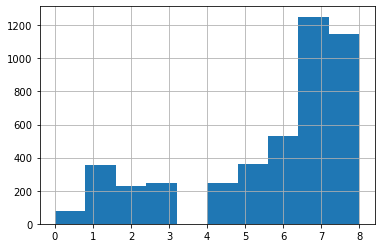

In [ ]:
df2.Cloud3pm.hist()

### Generamos estadisticas descriptivas con la columna Cloud3pm.

In [ ]:
df2.Cloud3pm.describe().T

count    4446.000000
mean        5.729645
std         2.342498
min         0.000000
25%         4.000000
50%         7.000000
75%         8.000000
max         8.000000
Name: Cloud3pm, dtype: float64

### Sustituimos los datos nulos en el dataframe
Los datos tipo objects, se rellena con las siglas "S/R" (Sin registro) y los datos tipo Float se rellenan con 0, los cuales tambien pueden ser remplazados por el promedio para nivelar los datos.


In [ ]:
df2["Cloud3pm"]=df2["Cloud3pm"].fillna(0)
df2["Cloud9am"]=df2["Cloud9am"].fillna(0)
df2["WindDir9am"]=df2["WindDir9am"].fillna('S/R')
df2["WindDir3pm"]=df2["WindDir3pm"].fillna('S/R')
df2["WindGustDir"]=df2["WindGustDir"].fillna('S/R')
df2.Rainfall= df2.Rainfall.fillna(0)
df2.WindGustSpeed=df2.WindGustSpeed.fillna(0)
df2.MinTemp =df2.MinTemp.fillna(0)
df2.MaxTemp =df2.MaxTemp.fillna(0)
df2.WindSpeed9am=df2.WindSpeed9am.fillna(0)
df2.WindSpeed3pm  = df2.WindSpeed3pm .fillna(0)
df2.Humidity9am = df2.Humidity9am.fillna(0)
df2.Humidity3pm = df2.Humidity3pm.fillna(0)
df2.Pressure9am = df2.Pressure3pm.fillna(0)
df2.Pressure3pm = df2.Pressure3pm.fillna(0)
df2.Temp9am=df2.Temp9am.fillna(0)
df2.Temp3pm=df2.Temp3pm.fillna(0)
df2.RainToday=df2.RainToday.fillna('S/R')

### Analizamos si hay alguna valor faltante, y en caso de haberlo se sumara el total.

In [ ]:
df2.isna().sum()

Location         0
RainTomorrow     0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

### Los valores tipo object, los reemplazamos por un codigo identificador para que puedan ser cuantitativos

In [ ]:
# one-encoding - label-encoding - Dump

df2.RainTomorrow = df2.RainTomorrow.replace({"No": 0, "Yes": 1})
df2.Location = df2.Location.replace({"Portland":1, "Adelaide": 2, "Melbourne":3})
df2.RainToday = df2.RainToday.replace({"No": 0, "Yes": 1, "S/R":2})
df2.WindDir9am= df2.WindDir9am.replace({'WNW':0, 'WSW':1, 'E':2, 'NW':3, 'W':4, 'SSE':5, 'ESE':6, 'ENE':7, 'NNW':8, 'SSW':9,
       'SW':10, 'SE':11, 'N':12, 'S':13, 'NNE':14, 'S/R':15, 'NE':16})
df2.WindGustDir= df2.WindGustDir.replace({'WNW':0, 'WSW':1, 'E':2, 'NW':3, 'W':4, 'SSE':5, 'ESE':6, 'ENE':7, 'NNW':8, 'SSW':9,
       'SW':10, 'SE':11, 'N':12, 'S':13, 'NNE':14, 'S/R':15, 'NE':16})
df2.WindDir3pm= df2.WindDir3pm.replace({'WNW':0, 'WSW':1, 'E':2, 'NW':3, 'W':4, 'SSE':5, 'ESE':6, 'ENE':7, 'NNW':8, 'SSW':9,
       'SW':10, 'SE':11, 'N':12, 'S':13, 'NNE':14, 'S/R':15, 'NE':16})
df2.head(10)

,Location,RainTomorrow,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
65745,3,0,9.5,15.4,2.0,4,63.0,4,4,37.0,35.0,60.0,38.0,1010.3,1010.3,1.0,7.0,11.0,14.6,1
65746,3,1,11.0,14.5,0.6,4,63.0,4,1,30.0,35.0,66.0,52.0,1016.2,1016.2,7.0,4.0,11.8,13.7,0
65747,3,0,8.4,14.1,1.4,4,39.0,4,4,17.0,24.0,72.0,58.0,1024.3,1024.3,7.0,7.0,10.6,13.9,1
65748,3,0,9.1,14.5,0.6,2,19.0,8,12,9.0,7.0,87.0,49.0,1029.0,1029.0,7.0,6.0,10.2,13.1,0
65749,3,0,4.3,15.5,0.0,12,52.0,12,14,24.0,30.0,81.0,52.0,1024.9,1024.9,2.0,5.0,5.5,14.6,0
65750,3,0,5.5,15.4,0.0,12,74.0,12,8,31.0,44.0,68.0,48.0,1020.1,1020.1,6.0,6.0,11.6,14.6,0
65751,3,1,11.5,14.3,0.0,14,57.0,12,12,28.0,22.0,73.0,63.0,1012.9,1012.9,8.0,7.0,12.2,13.3,0
65752,3,1,6.9,10.4,5.0,12,37.0,12,12,13.0,11.0,80.0,71.0,1017.0,1017.0,8.0,7.0,7.3,10.3,1
65753,3,1,3.6,14.8,1.2,12,35.0,12,1,11.0,17.0,95.0,61.0,1019.6,1019.6,1.0,7.0,4.2,13.1,1
65754,3,0,4.2,13.5,3.0,0,69.0,12,0,15.0,46.0,87.0,33.0,1006.7,1006.7,6.0,3.0,9.0,12.2,1


In [ ]:
#df2.isna().sum()

In [ ]:
#df2.dtypes

###  Se crea 2 arreglos, uno con todas las columnas en el dataFrame exceptuando "RainTomorrow" y en el otro se utilizan los datos en "RainTomorrow", en el que se realizaran pruebas, en este caso es al 20% y el 80% restante es de entrenamiento.

### Creamos un clasificador de árbol de decisión con profundidad 5, se genera el modelo y se procede a realizar una prediccion.

In [ ]:
#Para la otra data cambiar las variables
X= np.array(df2.drop(['RainTomorrow'],1)) # Datos numericos -categorias
y = np.array(df2['RainTomorrow'])# Datos no numericos Etiquetas - condicion
#X = X.astype(np.float)
#y = y.astype(np.float)
# Para la otra data cambiar las variables
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print('Son {} datos para entrenamiento y {} datos de prueba'.format(X_train.shape[0],X_test.shape[0]))
modelo= DecisionTreeClassifier(max_depth=5)
modelo.fit(X_train, y_train)
Y_pred=modelo.predict(X_test)
print('Precisión Regresión: {:0.2f}%'.format(modelo.score(X_train,y_train)))

Son 6816 datos para entrenamiento y 1705 datos de prueba
Precisión Regresión: 0.83%


### Utilizamos el balanceo, con el cual podemos analizar la frecuencia relativa, en este caso nos muestra que es un 71% mas frecuente que no llueva.

In [ ]:
df2.RainTomorrow.value_counts(normalize=True) # Balancear -

0    0.716113
1    0.283887
Name: RainTomorrow, dtype: float64

### Hacemos un arbol de regresión,

Profundidad del árbol: 5
Número de nodos terminales: 32


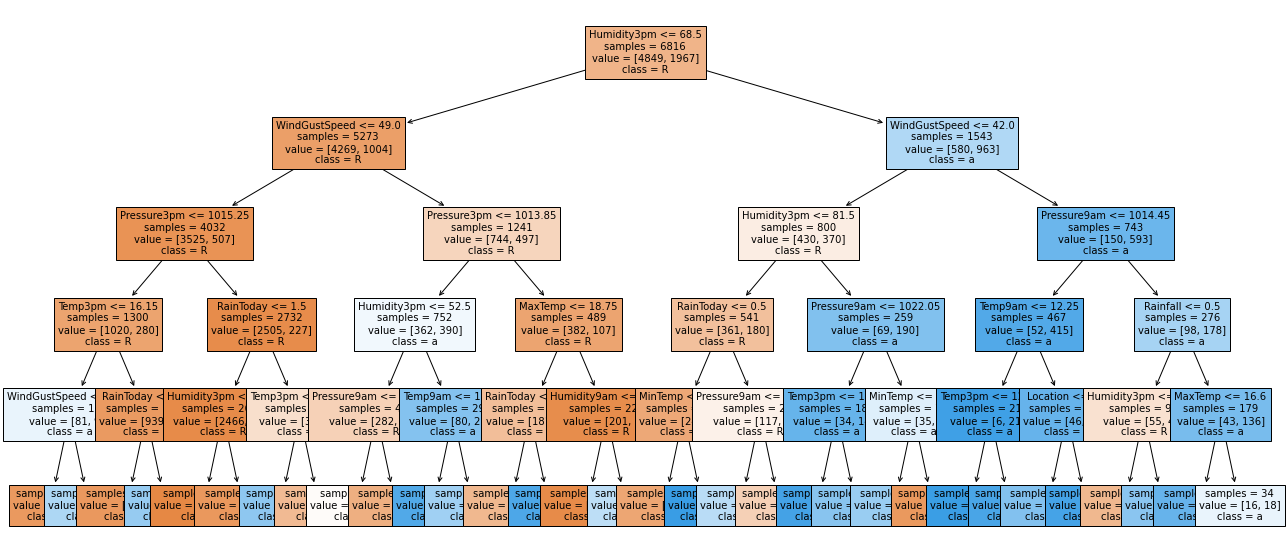

In [ ]:
fig, ax = plt.subplots(figsize=(22, 10))

print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo,
            feature_names = df2.drop(columns = "RainTomorrow").columns,
            class_names   = 'RainTomorrow',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )


### Esta es otra manera de interpretar el arbol, esta es una opcion menos grafica y mas lineal .


In [ ]:
texto_modelo = export_text(
                    decision_tree = modelo,
                    feature_names = list(df2.drop(columns = "RainTomorrow").columns)
               )
print(texto_modelo)

|--- Humidity3pm <= 68.50
|   |--- WindGustSpeed <= 49.00
|   |   |--- Pressure3pm <= 1015.25
|   |   |   |--- Temp3pm <= 16.15
|   |   |   |   |--- WindGustSpeed <= 30.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- WindGustSpeed >  30.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- Temp3pm >  16.15
|   |   |   |   |--- RainToday <= 1.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- RainToday >  1.50
|   |   |   |   |   |--- class: 1
|   |   |--- Pressure3pm >  1015.25
|   |   |   |--- RainToday <= 1.50
|   |   |   |   |--- Humidity3pm <= 60.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Humidity3pm >  60.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- RainToday >  1.50
|   |   |   |   |--- Temp3pm <= 15.75
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Temp3pm >  15.75
|   |   |   |   |   |--- class: 0
|   |--- WindGustSpeed >  49.00
|   |   |--- Pressure3pm <= 1013.85
|   |   |   |--- Humidity3pm <= 52.50
|   |   |   |   |--- Pressur

### Hacemos el grafico de correlacion, utilizando la columna RainTomorrow, para asi ver como se relacionan unas con otras, resaltando las columnas con mayor correlacion con un color mas fuerte, estando asi, mas cerca del 1.0

               Location   MinTemp   MaxTemp  Rainfall  WindGustDir  \
Location       1.000000  0.208296  0.187025 -0.065234     0.239052   
MinTemp        0.208296  1.000000  0.723865 -0.056457    -0.000526   
MaxTemp        0.187025  0.723865  1.000000 -0.230084     0.042218   
Rainfall      -0.065234 -0.056457 -0.230084  1.000000    -0.071639   
WindGustDir    0.239052 -0.000526  0.042218 -0.071639     1.000000   
WindGustSpeed  0.076618  0.127882 -0.002101  0.183876    -0.090809   
WindDir9am     0.080996 -0.015240  0.165163 -0.136759     0.235960   
WindDir3pm     0.193702 -0.019750 -0.027275 -0.053305     0.422514   
WindSpeed9am   0.089068  0.057911 -0.086349  0.127130     0.023528   
WindSpeed3pm   0.029162  0.032105 -0.047617  0.120802    -0.079897   
Humidity9am   -0.231769 -0.395773 -0.543312  0.214529    -0.073525   
Humidity3pm   -0.327696 -0.301922 -0.661514  0.254683    -0.119739   
Pressure9am    0.011280 -0.050177 -0.048813 -0.016644    -0.011005   
Pressure3pm    0.011

<AxesSubplot:>

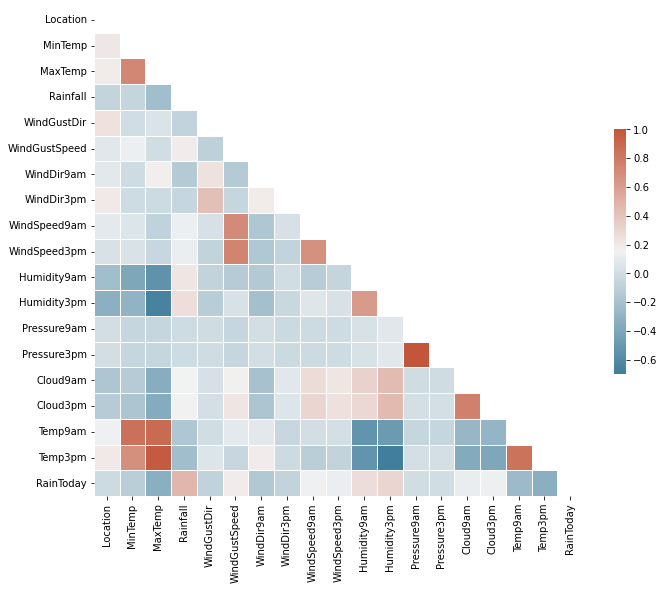

In [ ]:
# =============================================================================
# Correlacion
# =============================================================================

corr = df2.set_index('RainTomorrow').corr()
print(corr)

# Para excluir las correlaciones duplicadas
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Tamaño de la Figura
f, ax = plt.subplots(figsize=(11, 9))

# Generar paleta de color
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Mapa de calor con el Mask correcto
sns.heatmap(corr, mask=mask, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Aqui generamos el algoritmo, siendo, RainTomorrow ~ todas las variables, para así determinar las posibles variables de peso

In [ ]:
lm = sfm.ols(formula="RainTomorrow~Location+MinTemp+MaxTemp+Rainfall+WindGustDir+WindGustSpeed+WindDir9am+WindDir3pm+WindSpeed9am+WindSpeed3pm+Humidity9am+Humidity3pm+Pressure9am+Pressure3pm+Cloud9am+Cloud3pm+Temp9am+Temp3pm+RainToday", data=df2).fit()
lm.params

Intercept       -0.113952
Location        -0.000395
MinTemp         -0.002007
MaxTemp          0.004527
Rainfall         0.002440
WindGustDir     -0.001123
WindGustSpeed    0.011021
WindDir9am       0.006345
WindDir3pm      -0.002506
WindSpeed9am    -0.002770
WindSpeed3pm    -0.002932
Humidity9am     -0.000843
Humidity3pm      0.008875
Pressure9am     -0.000231
Pressure3pm     -0.000231
Cloud9am        -0.012399
Cloud3pm         0.010448
Temp9am          0.001257
Temp3pm         -0.003550
RainToday        0.141528
dtype: float64

###  p-values para saber si son variables de peso tiene que ser <= 0.05

In [ ]:
lm.pvalues

Intercept         2.324024e-01
Location          9.466067e-01
MinTemp           2.887223e-01
MaxTemp           1.240911e-01
Rainfall          9.041908e-03
WindGustDir       2.765893e-01
WindGustSpeed    1.237268e-117
WindDir9am        2.612790e-11
WindDir3pm        1.208564e-02
WindSpeed9am      4.111071e-05
WindSpeed3pm      1.100301e-04
Humidity9am       5.863777e-03
Humidity3pm      2.200056e-111
Pressure9am       9.341768e-08
Pressure3pm       9.341768e-08
Cloud9am          2.225373e-10
Cloud3pm          1.953914e-07
Temp9am           5.728047e-01
Temp3pm           2.167454e-01
RainToday         1.792785e-49
dtype: float64

### Aqui podemos observar un resumen de la tabla resumen de regresion

In [ ]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           RainTomorrow   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     201.7
Date:                Sat, 04 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:54:44   Log-Likelihood:                -3788.3
No. Observations:                8521   AIC:                             7615.
Df Residuals:                    8502   BIC:                             7749.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.1140      0.095     -1.194      0.232      -0.301       0.073
Location         -0.0004      0.006     -0.067      0.947      -0.012       0.011
MinTemp          -0.0020      0.002     -1.061      0.289      -0.006       0.002
MaxTemp           0.0045      0.003      1.538      0.124      -0.001       0.010
Rainfall          0.0024      0.001      2.611      0.009       0.001       0.004
WindGustDir      -0.0011      0.001     -1.088      0.277      -0.003       0.001
WindGustSpeed     0.0110      0.000     23.423      0.000       0.010       0.012
WindDir9am        0.0063      0.001      6.676      0.000       0.004       0.008
WindDir3pm       -0.0025      0.001     -2.510      0.012      -0.004      -0.001
WindSpeed9am     -0.0028      0.001     -4.103      0.000      -0.004      -0.001
WindSpeed3pm     -0.0029      0.001     -3.869      0.000      -0.004      -0.001
Humidity9am      -0.0008      0.000     -2.756      0.006      -0.001      -0.000
Humidity3pm       0.0089      0.000     22.762      0.000       0.008       0.010
Pressure9am      -0.0002   4.33e-05     -5.344      0.000      -0.000      -0.000
Pressure3pm      -0.0002   4.33e-05     -5.344      0.000      -0.000      -0.000
Cloud9am         -0.0124      0.002     -6.353      0.000      -0.016      -0.009
Cloud3pm          0.0104      0.002      5.208      0.000       0.007       0.014
Temp9am           0.0013      0.002      0.564      0.573      -0.003       0.006
Temp3pm          -0.0035      0.003     -1.235      0.217      -0.009       0.002
RainToday         0.1415      0.010     14.882      0.000       0.123       0.160
==============================================================================
Omnibus:                      546.226   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              651.104
Skew:                           0.672   Prob(JB):                    4.12e-142
Kurtosis:                       2.830   Cond. No.                     6.20e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.59e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Vamos a traspasar la data limpia ( df2) a un archivo csv para comenzar a trabajar con el/

In [ ]:
df2.to_csv('df2.csv')

In [ ]:
df2.shape

(8521, 20)

### Creamos el dataframe df3 con las columnas:

In [ ]:
df3 = pd.DataFrame(df2, columns = [ 'Location','RainTomorrow', 'MinTemp', 'MaxTemp', 'Rainfall',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Temp3pm'])
df3.head()

,Location,RainTomorrow,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp3pm
65745,3,0,9.5,15.4,2.0,4,63.0,4,4,37.0,35.0,60.0,38.0,1010.3,1010.3,14.6
65746,3,1,11.0,14.5,0.6,4,63.0,4,1,30.0,35.0,66.0,52.0,1016.2,1016.2,13.7
65747,3,0,8.4,14.1,1.4,4,39.0,4,4,17.0,24.0,72.0,58.0,1024.3,1024.3,13.9
65748,3,0,9.1,14.5,0.6,2,19.0,8,12,9.0,7.0,87.0,49.0,1029.0,1029.0,13.1
65749,3,0,4.3,15.5,0.0,12,52.0,12,14,24.0,30.0,81.0,52.0,1024.9,1024.9,14.6


In [ ]:
df3.describe().T


,count,mean,std,min,25%,50%,75%,max
Location,8521.0,1.934163,0.795680,1.0,1.0,2.0,3.0,3.0
RainTomorrow,8521.0,0.283887,0.450909,0.0,0.0,0.0,1.0,1.0
MinTemp,8521.0,11.303920,4.533595,-1.5,8.1,10.9,14.2,33.9
MaxTemp,8521.0,20.620303,6.518753,0.0,15.6,19.1,24.2,46.4
Rainfall,8521.0,1.939186,5.068596,0.0,0.0,0.0,1.4,82.2
WindGustDir,8521.0,7.223917,4.579614,0.0,3.0,8.0,12.0,16.0
WindGustSpeed,8521.0,40.724563,15.060428,0.0,30.0,39.0,50.0,106.0
WindDir9am,8521.0,9.021476,4.704272,0.0,5.0,10.0,12.0,16.0
WindDir3pm,8521.0,7.086727,4.636694,0.0,3.0,8.0,11.0,16.0
WindSpeed9am,8521.0,14.776669,9.524024,0.0,9.0,13.0,20.0,65.0


### Realizamos el modelo nuevamente, pero ahora sin las 3 variables que sacamos, y vemos nuevamente la prediccion, si lo analizamos en comparacion al anterior, la prediccion cambia en un 0,1%

In [ ]:
#Para la otra data cambiar las variables
X= np.array(df3.drop(['RainTomorrow'],1)) # Datos numericos -categorias
y = np.array(df3['RainTomorrow'])# Datos no numericos Etiquetas - condicion
#X = X.astype(np.float)
#y = y.astype(np.float)
# Para la otra data cambiar las variables
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print('Son {} datos para entrenamiento y {} datos de prueba'.format(X_train.shape[0],X_test.shape[0]))
modelo1= DecisionTreeClassifier(max_depth=5)
modelo1.fit(X_train, y_train)
Y_pred=modelo1.predict(X_test)
print('Precisión Clasificación: {:0.2f}%'.format(modelo1.score(X_train,y_train)))

Son 6816 datos para entrenamiento y 1705 datos de prueba
Precisión Clasificación: 0.82%


###  Como ya entrenamos la data, copiamos el modelo anterior y realizamos el algoritmo de clasificacion de Vector Machine

In [ ]:
modeloSVC= SVC()
modeloSVC.fit(X_train, y_train)
Y_pred=modeloSVC.predict(X_test)
print('Precisión Máquinas de Vectores de Soporte: {:0.2f}%'.format(modeloSVC.score(X_train,y_train)))

Precisión Máquinas de Vectores de Soporte: 0.72%


### Aqui realizamos otro algoritmo KNeighborsClassifier

In [ ]:
modeloKNC= KNeighborsClassifier()
modeloKNC.fit(X_train, y_train)
Y_pred=modeloKNC.predict(X_test)
print('Precisión KNeighborsClassifier: {:0.2f}%'.format(modeloKNC.score(X_train,y_train)))

Precisión KNeighborsClassifier: 0.86%


#### De los 3 modelos que realizamos, el modelo de  KNeighborsClassifier es el que tiene una mayor presicion.

### Aqui junto ingresamos los valores para que el algoritmo supervisado realize la prediccion, Llovera?


In [ ]:
# df2 [8 categorias - 1 etiqueta]
loc =float(input('Ingrese locacion: '))
minT=float(input('Ingrese MinTemp: '))
maxT=float(input('Ingrese MaxTemp: '))
rail=float(input('Ingrese Rainfall: '))
winD=float(input('Ingrese WindGustDir: '))
winG=float(input('Ingrese WindGustSpeed: '))
win9=float(input('Ingrese WindDir9am: '))
win3=float(input('Ingrese WindDir3pm: '))
win91=float(input('Ingrese WindSpeed9am: '))
win93=float(input('Ingrese WindSpeed3pm: '))
hu3=float(input('Ingrese Humidity9am: '))
hum9=float(input('Ingrese Humidity3pm: '))
pre9=float(input('Ingrese Pressure9am: '))
pre3=float(input('Ingrese Pressure3pm: '))
temp3=float(input('Ingrese Temp3pm: '))
#X_train, y_train
modelo1= DecisionTreeClassifier()
modelo1.fit(X_train, y_train)
resp = modelo1.predict([[loc, minT,maxT,rail,winD,winG,win9,win3,win91,win93,hu3,hum9,pre9,pre3,temp3]])
print('Con una prediccion del {:0.2f}%, Llovera SI [1] - NO[0] es: {} '.format(modelo1.score(X_train, y_train),resp))

Ingrese locacion: 1
Ingrese MinTemp: 0.283887
Ingrese MaxTemp: 11.303920
Ingrese Rainfall: 20.620303
Ingrese WindGustDir: 1.939186
Ingrese WindGustSpeed: 7.223917
Ingrese WindDir9am: 40.724563
Ingrese WindDir3pm: 9.021476
Ingrese WindSpeed9am: 7.086727
Ingrese WindSpeed3pm: 14.776669
Ingrese Humidity9am: 68.029574
Ingrese Humidity3pm: 53.826429
Ingrese Pressure9am: 1014.068490
Ingrese Pressure3pm: 1014.068490
Ingrese Temp3pm: 19.125736
Con una prediccion del 1.00%, Llovera SI [1] - NO[0] es: [0] 


In [ ]:
df3.describe().T



,count,mean,std,min,25%,50%,75%,max
Location,8521.0,1.934163,0.795680,1.0,1.0,2.0,3.0,3.0
RainTomorrow,8521.0,0.283887,0.450909,0.0,0.0,0.0,1.0,1.0
MinTemp,8521.0,11.303920,4.533595,-1.5,8.1,10.9,14.2,33.9
MaxTemp,8521.0,20.620303,6.518753,0.0,15.6,19.1,24.2,46.4
Rainfall,8521.0,1.939186,5.068596,0.0,0.0,0.0,1.4,82.2
WindGustDir,8521.0,7.223917,4.579614,0.0,3.0,8.0,12.0,16.0
WindGustSpeed,8521.0,40.724563,15.060428,0.0,30.0,39.0,50.0,106.0
WindDir9am,8521.0,9.021476,4.704272,0.0,5.0,10.0,12.0,16.0
WindDir3pm,8521.0,7.086727,4.636694,0.0,3.0,8.0,11.0,16.0
WindSpeed9am,8521.0,14.776669,9.524024,0.0,9.0,13.0,20.0,65.0


# Hipotesis:

### A partir de las variables con mas peso, que pudimos sacar con el algoritmo, de las 3 ciudades que seleccionamos, Melbourne, Adelaide y Portland.
### Es mas probable de que llueva alrededor de las 3 ciudades,  habiendo unas condiciones atmosfericas promedio,

